
This is an example acoustic analysis done on the song from _Copsychus malabaricus_ or the __white-rumped shama__.  The shama is a small passerine bird of the family Muscicapidae and comes from India and southeast Asia, but it is now commonly seen in Hawaii.  This sample comes from our backyard in Aina Haina. 

<center>
<img src='./images/shama.jpg'>
</center>

First, as always, we import the needed packages; in this case pyaudio to grab sound from the microphone (either internal or external), struct to convert the digital sound from packed binary to integer, numpy for array handling, scipy for fft (making spectrum) and matplotlib to plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from skimage import util

Play the audio file just to see what it sounds like

In [5]:
from IPython.display import Audio
Audio('./data/shama.wav')

In [6]:
# read data from wav file
rate, audio = wavfile.read('./data/shama.wav')

/var/folders/00/m_p76xcd75jg4kx7_wyjwd500000gn/T/ipykernel_47428/4144834843.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, audio = wavfile.read('./data/shama.wav')


Display the length of the audio array and sample rate:

In [7]:
print(f"number of channels = {audio.shape[1]}")
length = audio.shape[0] / rate
print(f"length = {length}s")

number of channels = 2
length = 6.435759637188209s


Visualizing Audio

In order to display plots inside the Jupyter notebook, run the following commands, preferably at the top of your notebook:

In [8]:
# convert to mono by averaging the left and right channels.
audio = np.mean(audio, axis=1)

# get shape and length of record
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

Audio length: 6.44 seconds


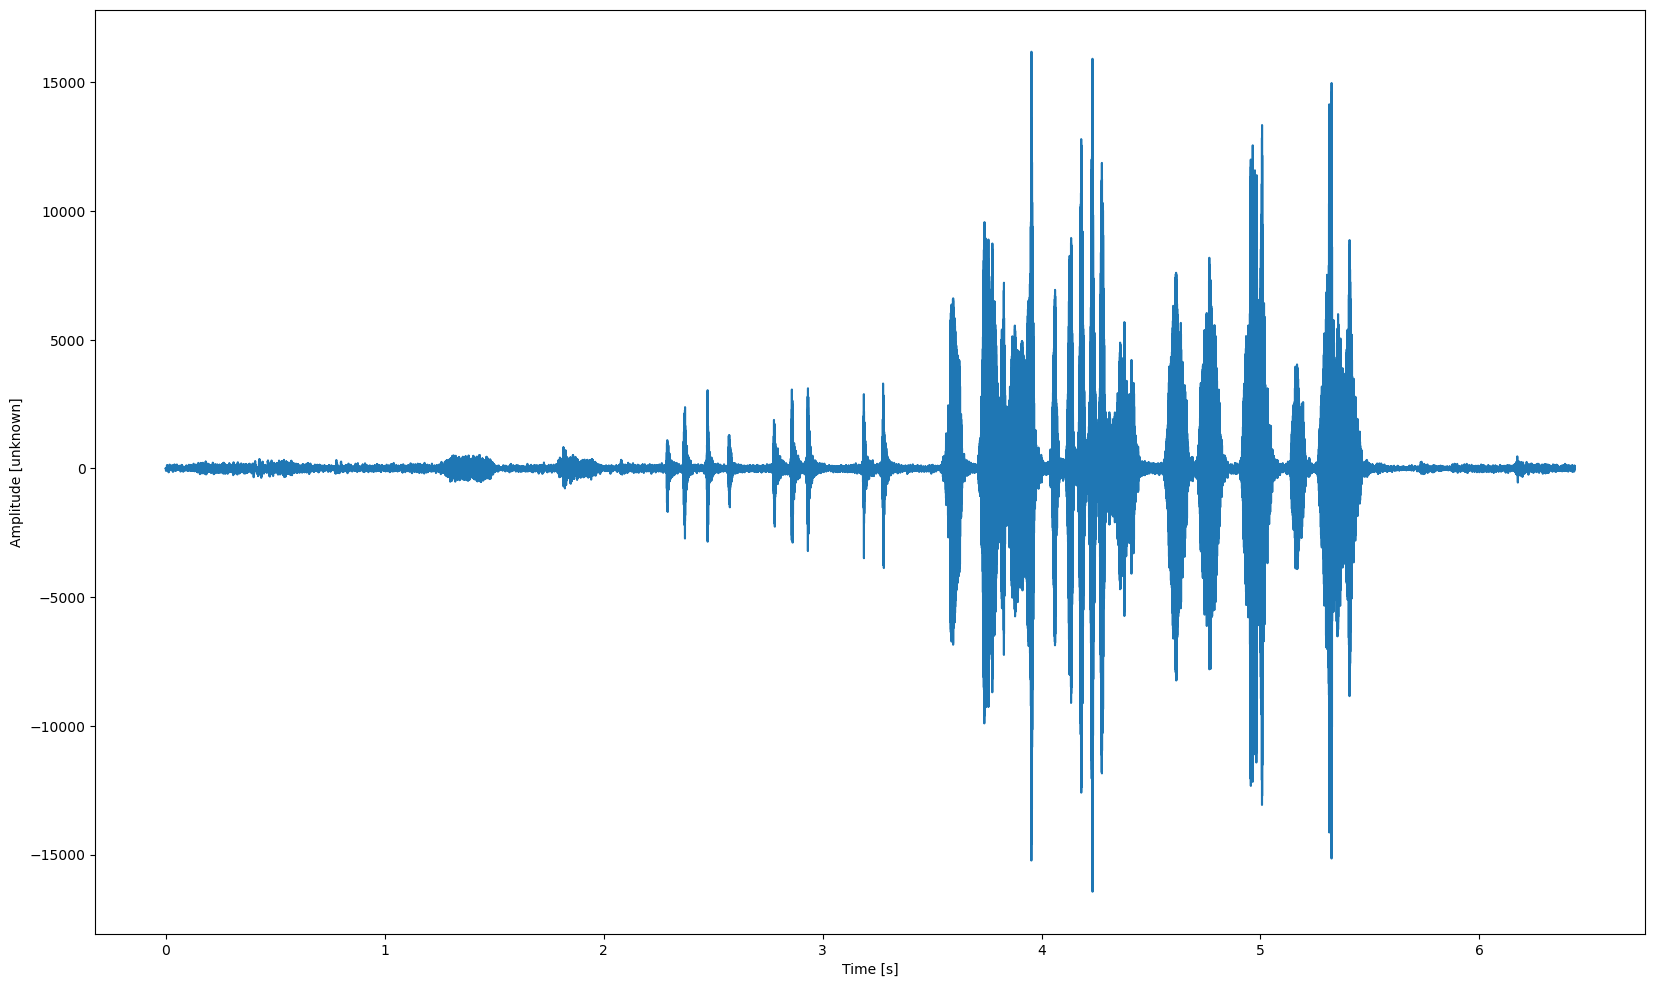

In [9]:
# make a plot
f, ax = plt.subplots(figsize=(20,12))
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]')
plt.show()

Start by chopping up the signal into slices of 1024 samples, each slice overlapping the previous by 100 samples. The resulting slices object contains one slice per row.

In [10]:
M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (283817,), Sliced audio shape: (2828, 1024)


Generate a windowing function (see “Windowing” for a discussion of the underlying assumptions and interpretations of each) and multiply it with the signal:

In [11]:
win = np.hanning(M + 1)[:-1]
slices = slices * win
# It’s more convenient to have one slice per column, so we take the transpose:
slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 2828)


For each slice, calculate the DFT, which returns both positive and negative frequencies (more on that in “Frequencies and Their Ordering”), so we slice out the positive M2 frequencies for now.
(As a quick aside, you’ll note that we use scipy.fftpack.fft and np.fft interchangeably. NumPy provides basic FFT functionality, which SciPy extends further, but both include an fft function, based on the Fortran FFTPACK.)


In [12]:
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

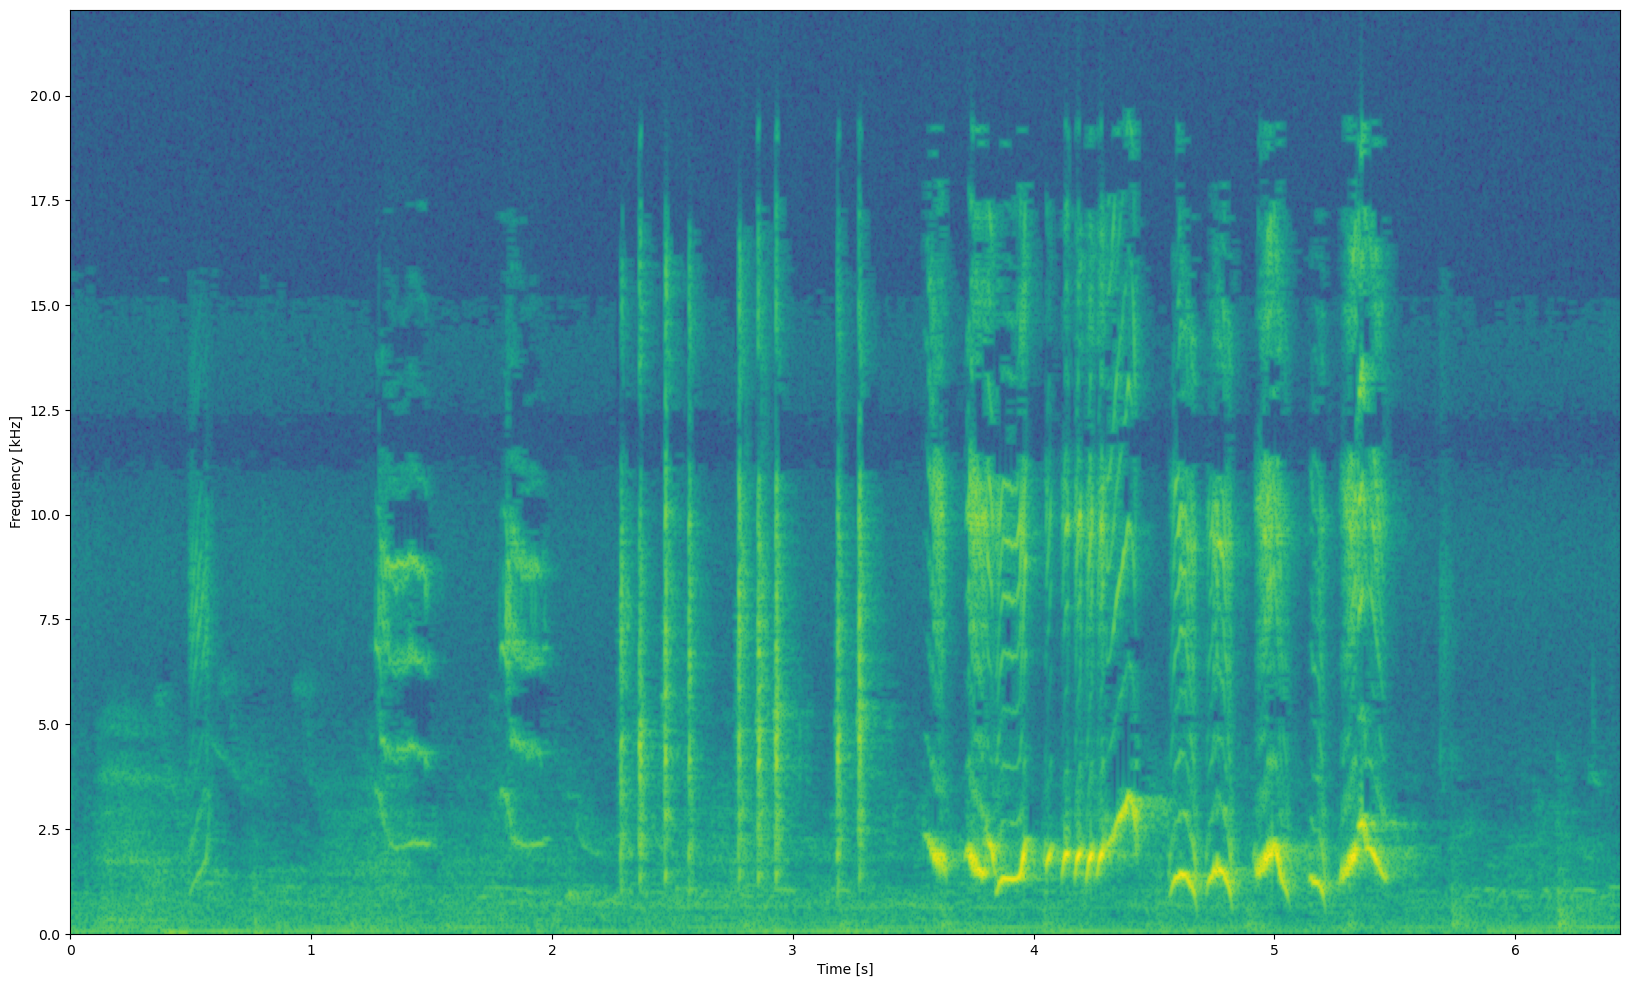

In [13]:
# make a plot
f, ax = plt.subplots(figsize=(20,12))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')
plt.show()